In [23]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [24]:
train_dir = r'Apple\Train'
val_dir = r'Apple\Val'


In [25]:
img_height, img_width = 128, 128
batch_size = 32

# 2. Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical'
)

Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.


In [26]:
# 2. CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [27]:
# 3. Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
!pip install scipy



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# 4. Train
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history=model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop])

# 5. Save the model
model.save("plant_disease_detector.h5")

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 72s 283ms/step - accuracy: 0.5674 - loss: 0.9855 - val_accuracy: 0.8357 - val_loss: 0.4746
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 65s 265ms/step - accuracy: 0.8687 - loss: 0.3520 - val_accuracy: 0.8764 - val_loss: 0.4495
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 65s 266ms/step - accuracy: 0.9089 - loss: 0.2600 - val_accuracy: 0.8500 - val_loss: 0.4433
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 66s 270ms/step - accuracy: 0.9281 - loss: 0.2018 - val_accuracy: 0.8861 - val_loss: 0.3828
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 66s 270ms/step - accuracy: 0.9319 - loss: 0.1839 - val_accuracy: 0.8849 - val_loss: 0.4272
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 65s 267ms/step - accuracy: 0.9441 - loss: 0.1511 - val_accuracy: 0.9078 - val_loss: 0.2798
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 65s 269ms/step - accuracy: 0.9498 - loss: 0.1367 - val_accuracy: 0.9668 - val_loss: 0.1111
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 65s 268ms/step - accuracy: 0.9505 - loss: 0

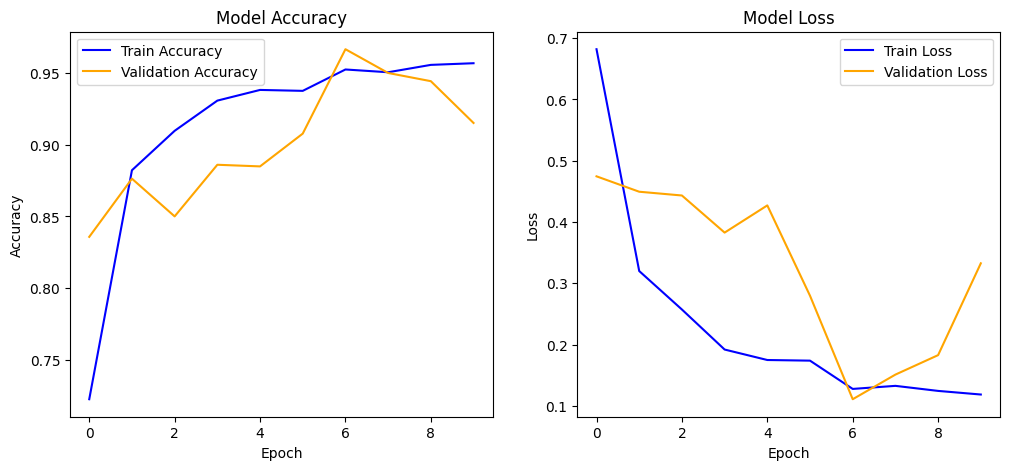

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9686 - loss: 0.1020
Validation Loss: 0.1111
Validation Accuracy: 0.9668
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step
Classification Report:
                  precision    recall  f1-score   support

      Apple Scab       0.25      0.23      0.24       453
       Black Rot       0.24      0.26      0.25       447
Cedar Apple Rust       0.23      0.22      0.22       396
         Healthy       0.30      0.31      0.30       451

        accuracy                           0.26      1747
       macro avg       0.25      0.25      0.25      1747
    weighted avg       0.26      0.26      0.26      1747



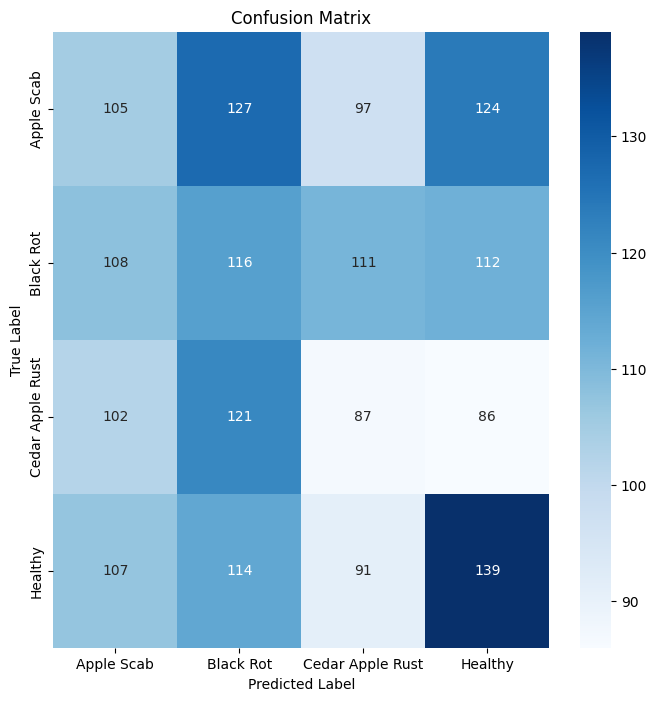

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

# 8. Evaluation on Validation Set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 9. Predictions and Confusion Matrix
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Classification Report
print("Classification Report:")
class_labels = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()